<a href="https://colab.research.google.com/github/gcullie/Simple-Reinforcement-Learning-with-Tensorflow/blob/master/cnc_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import cv2 as cv
import numpy as np

print("TensorFlow version: ", tf.__version__)

x = 324
y = 576

TensorFlow version:  1.14.0


In [3]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()


Saving cnc-0.jpg to cnc-0.jpg


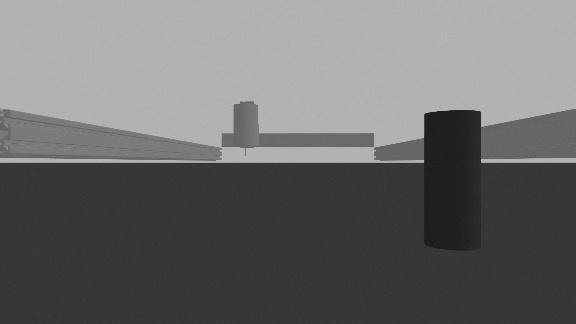

In [4]:
Image("cnc-0.jpg",width=576)

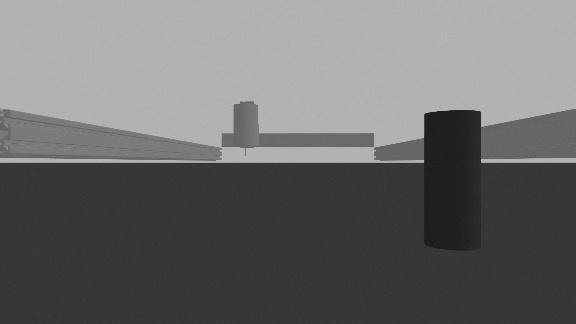

In [4]:
from google.colab.patches import cv2_imshow

cv_image = cv.imread("cnc-0.jpg")
cv2_imshow(cv_image)


In [5]:
class CNNModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(CNNModel, self).__init__(**kwargs)
    
    self.input_ = tf.keras.layers.Conv2D(32, (8, 8), activation='relu', input_shape=(324,576,3))
    #self.act1 = tf.keras.layers.Activation('relu')
    self.conv2 = tf.keras.layers.Conv2D(64, (4, 4), strides=(2,2))
    self.act2 = tf.keras.layers.Activation('relu')
    self.conv3 = tf.keras.layers.Conv2D(32, (3, 3))
    self.act3 = tf.keras.layers.Activation('relu')
    self.flatt1 = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(50)
    self.act4 = tf.keras.layers.Activation('relu')
    nb_actions = 6
    self.output_ = tf.keras.layers.Dense(nb_actions, activation=tf.nn.softmax, kernel_initializer=tf.keras.initializers.Constant(value=(1/nb_actions)))
 
  def call(self, input):
    """Run the model."""
    result = self.input_(input,batch_size=None)
    return result

  print("done")

done


In [39]:
nb_actions = 6
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(16, (8, 8), input_shape=(324,576,3)))#TODO: add stacked images so it can predict velocity and direction
model.add(tf.keras.layers.Conv2D(16, (8, 8), strides=(2,2)))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Convolution2D(64, (4, 4), strides=(2,2)))
#model.add(tf.keras.layers.Activation('relu'))#Rectified Linear Unit
#model.add(tf.keras.layers.Convolution2D(32, (3, 3)))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(50))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dense(nb_actions, activation=tf.nn.softmax, kernel_initializer=tf.keras.initializers.Constant(value=(1/nb_actions))))#equal distribution of weight

model.compile(optimizer='adam', loss=tf.losses.log_loss)


image_data = np.asarray(cv_image)
print(image_data.shape)
print(image_data.dtype)
#print(image_data.numpy().max())

#image_gt = tf.image.convert_image_dtype(image_data, dtype=tf.int32)
#image_gt = tf.cast(image_data, tf.int32)
#print(image_gt.shape)
#print(image_gt.dtype)
#print(image_gt.numpy().max())

#results = model.call(imageWithAddedTensor)
imageWithAddedTensor = np.expand_dims(image_data, axis=0)
print(imageWithAddedTensor.shape)
print(imageWithAddedTensor.dtype)

newImage = model.predict(imageWithAddedTensor,batch_size=None)[0]
print(newImage.shape)
print(newImage.dtype)
#newImage



(324, 576, 3)
uint8
(1, 324, 576, 3)
uint8
(155, 281, 16)
float32


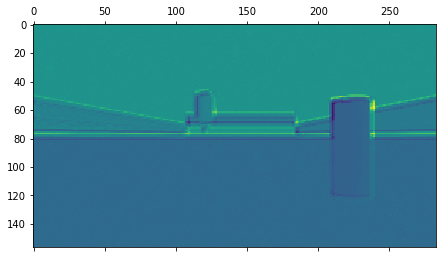

In [37]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#plt.matshow(newImage[0, :, :, 15], cmap='viridis')
plt.matshow(newImage[:, :, 15], cmap='viridis')

In [99]:
image_data = np.asarray(cv_image)
print(image_data.shape)
print(image_data.dtype)
#print(image_data.numpy().max())

#image_gt = tf.image.convert_image_dtype(image_data, dtype=tf.int32)
image_gt = tf.cast(image_data, tf.int32)
print(image_gt.shape)
print(image_gt.dtype)
#print(image_gt.numpy().max())

#results = model.call(imageWithAddedTensor)
imageWithAddedTensor = np.expand_dims(image_gt, axis=0)
print(imageWithAddedTensor.shape)
print(imageWithAddedTensor.dtype)

x = tf.keras.layers.Conv2D(32, (8, 8), activation='relu', input_shape=(324,576,3))(imageWithAddedTensor)

(324, 576, 3)
uint8
(324, 576, 3)
<dtype: 'int32'>
(1,)
object


TypeError: ignored

In [84]:
model = CNNModel()
image_data = np.asarray(cv_image)
#image_gt = tf.image.convert_image_dtype(image_data, dtype=tf.int32)
print(image_data.shape)
imageWithAddedTensor = np.expand_dims(image_data, axis=0)
results = model.call(imageWithAddedTensor)

(324, 576, 3)


ValueError: ignored